In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import os

c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#here grab dataset from folder
#batch_size = 50
img_height = 224
img_width = 224
ushapes = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_supervised/square_images_size224_cleaned/UShape/"
no_ushapes = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_supervised/square_images_size224_cleaned/NoUShape/"

In [3]:
def extract_spectrograms(path):
  os.chdir(path)
  spectrograms = []

  with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.png'):
        spectrograms.append(file.path)
  return spectrograms

ushapes_spectrograms = extract_spectrograms(ushapes)
no_ushape_spectrograms = extract_spectrograms(no_ushapes)
total_spectograms = ushapes_spectrograms + no_ushape_spectrograms
print(f"total specto: {len(total_spectograms)}, ushape: {len(ushapes_spectrograms)}, noushape: {len(no_ushape_spectrograms)}")
training_size = int(len(total_spectograms) * 0.01)
testing_size = int(len(total_spectograms) * 0.25)
unlabeled_size = int(len(total_spectograms) * .74)
print(f"training size: {training_size}, testing size: {testing_size}, unlabeled size: {unlabeled_size}")

import random
random.shuffle(total_spectograms)




total specto: 3990, ushape: 168, noushape: 3822
training size: 39, testing size: 997, unlabeled size: 2952


In [4]:
semi_supervised_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/"
train_ushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/train/ushape/"
train_noushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/train/noushape/"
test_ushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/test/ushape/"
test_noushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/test/noushape/"
unlabeled_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/unlabeled/"
#clear folders just in case
if len(os.listdir(train_ushape_path))!=0:
    for f in os.listdir(train_ushape_path):
        os.remove(train_ushape_path+f)
if len(os.listdir(train_noushape_path))!=0:
    for f in os.listdir(train_noushape_path):
        os.remove(train_noushape_path + f)
if len(os.listdir(test_ushape_path))!=0:
    for f in os.listdir(test_ushape_path):
        os.remove(test_ushape_path+f)
if len(os.listdir(test_noushape_path))!=0:
    for f in os.listdir(test_noushape_path):
        os.remove(test_noushape_path+f)



In [5]:
fold_0_path = unlabeled_path + r"fold_0/"
fold_1_path = unlabeled_path + r"fold_1/"
fold_2_path = unlabeled_path + r"fold_2/"
fold_3_path = unlabeled_path + r"fold_3/"
#clear fold folders just in case
if len(os.listdir(fold_0_path))!=0:
    for f in os.listdir(fold_0_path):
        os.remove(fold_0_path+f)
if len(os.listdir(fold_1_path))!=0:
    for f in os.listdir(fold_1_path):
        os.remove(fold_1_path + f)
if len(os.listdir(fold_2_path))!=0:
    for f in os.listdir(fold_2_path):
        os.remove(fold_2_path+f)
if len(os.listdir(fold_3_path))!=0:
    for f in os.listdir(fold_3_path):
        os.remove(fold_3_path+f)

## adjust below for changing size of amount of data in each the training, testing, and unlabeled

In [6]:
third_ushape = 168/3
third_noushape = 3822/3 * 0.25
limit_noushape = 170
#splitting ushape

for i, ushape in enumerate(os.listdir(ushapes)):
    if(ushape.endswith('png')):
        if i<third_ushape:
            shutil.copy(ushapes + ushape, train_ushape_path + ushape)
        elif i>third_ushape and i<third_ushape*2:
            shutil.copy(ushapes + ushape, test_ushape_path + ushape)
        elif i>third_ushape*2:
            shutil.copy(ushapes + ushape, unlabeled_path + ushape)


In [7]:
#spltting noushape regular
for i, noushape in enumerate(os.listdir(no_ushapes)):
    if(noushape.endswith('png')):
        if i<third_noushape:
            shutil.copy(no_ushapes + noushape, train_noushape_path + noushape)
        elif i>third_noushape and i<third_noushape*2:
            shutil.copy(no_ushapes + noushape, test_noushape_path + noushape)
        elif i>third_noushape*2:
            shutil.copy(no_ushapes + noushape, unlabeled_path + noushape)

In [8]:
#spltting noushape for balanced dataset
# for i, noushape in enumerate(os.listdir(no_ushapes)):
#     if(noushape.endswith('png')):
#         if i<limit_noushape/3:
#             shutil.copy(no_ushapes + noushape, train_noushape_path + noushape)
#         elif i>limit_noushape/3 * 2 and i<limit_noushape:
#             shutil.copy(no_ushapes + noushape, test_noushape_path + noushape)
#         else:
#             shutil.copy(no_ushapes + noushape, unlabeled_path + noushape)

In [9]:
print(f"size of training = {len(os.listdir(train_ushape_path))+len(os.listdir(train_noushape_path))}")
print(f"size of testing = {len(os.listdir(test_ushape_path))+len(os.listdir(test_noushape_path))}")
print(f"size of unlabeled = {len(os.listdir(unlabeled_path))-4}")
print(f"total spectograms = {len(os.listdir(train_ushape_path))+len(os.listdir(train_noushape_path)) + len(os.listdir(test_ushape_path))+len(os.listdir(test_noushape_path)) +len(os.listdir(unlabeled_path))-4}")

size of training = 366
size of testing = 373
size of unlabeled = 3248
total spectograms = 3987


In [10]:
#split unlabeled between folds
fold_length = len(os.listdir(unlabeled_path))-4
for i, unlabeled in enumerate(os.listdir(unlabeled_path)):
    if(unlabeled.endswith('png')):
        if i<fold_length/4:
            shutil.move(unlabeled_path + unlabeled, fold_0_path + unlabeled)
        elif i>fold_length/4 and i<fold_length/4*2:
            shutil.move(unlabeled_path + unlabeled, fold_1_path + unlabeled)
        elif i>fold_length/4*2 and i<fold_length/4*3:
            shutil.move(unlabeled_path + unlabeled, fold_2_path + unlabeled)
        else:
            shutil.move(unlabeled_path + unlabeled, fold_3_path + unlabeled)

In [11]:
# here we put spectograms into their own lists

train_ushape = extract_spectrograms(train_ushape_path)
train_noushape = extract_spectrograms(train_noushape_path)
test_ushape = extract_spectrograms(test_ushape_path)
test_noushape = extract_spectrograms(test_noushape_path)
print(len(train_ushape), len(train_noushape), len(test_ushape), len(test_noushape))

56 310 55 318


In [12]:
# put splits into their own list
fold_0 = extract_spectrograms(fold_0_path)
fold_1 = extract_spectrograms(fold_1_path)
fold_2 = extract_spectrograms(fold_2_path)
fold_3 = extract_spectrograms(fold_3_path)

In [13]:
print(len(fold_0))
print(len(fold_1))
print(len(fold_2))
print(len(fold_3))

808
811
811
818


In [14]:
#create pandas data frames
def fill_df_with_label(spectrograms, label):
  new_df =  pd.DataFrame()
  new_df['filename'] = spectrograms
  new_df['label'] = [label] * len(spectrograms)

  return new_df
df_train = fill_df_with_label(train_ushape, "ushape").append(fill_df_with_label(train_noushape, "noshape"))
print(df_train)
df_test = fill_df_with_label(test_ushape, "ushape").append(fill_df_with_label(test_noushape, "noshape"))
print(df_test)

def turn_fold_to_dataframe(spectograms):
  new_df = pd.DataFrame()
  new_df['filename'] = spectograms
  return new_df 

fold0_dataframe = turn_fold_to_dataframe(fold_0)
fold1_dataframe = turn_fold_to_dataframe(fold_1)
fold2_dataframe = turn_fold_to_dataframe(fold_2)
fold3_dataframe = turn_fold_to_dataframe(fold_3)

                                              filename    label
0    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
1    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
2    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
3    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
4    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
..                                                 ...      ...
305  C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...  noshape
306  C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...  noshape
307  C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...  noshape
308  C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...  noshape
309  C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...  noshape

[366 rows x 2 columns]
                                              filename    label
0    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
1    C:/Users/jereb/Downloads/harp_dataset/HARP_DAT...   ushape
2    C:/Users/je

## metric to adjust is batch size

In [15]:
# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


#TODO edit parameters after changing lists to be dataframes
# Generate batches and augment the images
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    # directory='harp/validation/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

Found 366 validated image filenames belonging to 2 classes.
Found 373 validated image filenames belonging to 2 classes.


In [16]:
def create_model(METRICS):
  model = Sequential([
    #data_augmentation,
    layers.Input(shape=(224, 224, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=METRICS)
  return model

In [17]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

## another metric to adjust is epoch

In [18]:
epochs = 25
model = create_model(METRICS)
history = model.fit_generator(generator=
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)

fold0_generator = test_datagen.flow_from_dataframe(
    fold0_dataframe,
    # directory='harp/validation/',
    class_mode=None,
    target_size=(224, 224),
)
predictions_0 = model.predict_generator(fold0_generator,np.ceil(len(fold_0)/32))

C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\3449558793.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
12/12 [==============================] - 13s 904ms/step - loss: 0.4947 - accuracy: 0.8033 - precision: 0.2333 - recall: 0.1250 - auc: 0.5764 - prc: 0.2061 - val_loss: 0.4725 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4586 - val_prc: 0.1280
Epoch 2/25
12/12 [==============================] - 7s 607ms/step - loss: 0.4212 - accuracy: 0.8470 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6041 - prc: 0.1891 - val_loss: 0.4424 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5344 - val_prc: 0.1552
Epoch 3/25
12/12 [==============================] - 7s 595ms/step - loss: 0.3992 - accuracy: 0.8470 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6868 - prc: 0.2846 - val_loss: 0.4361 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5687 - val_prc: 0.1919
Epoch 4/25
12/12 [==============================] - 7s 593ms/step - loss: 0.3726 - accuracy: 0.

C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\3449558793.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_0 = model.predict_generator(fold0_generator,np.ceil(len(fold_0)/32))


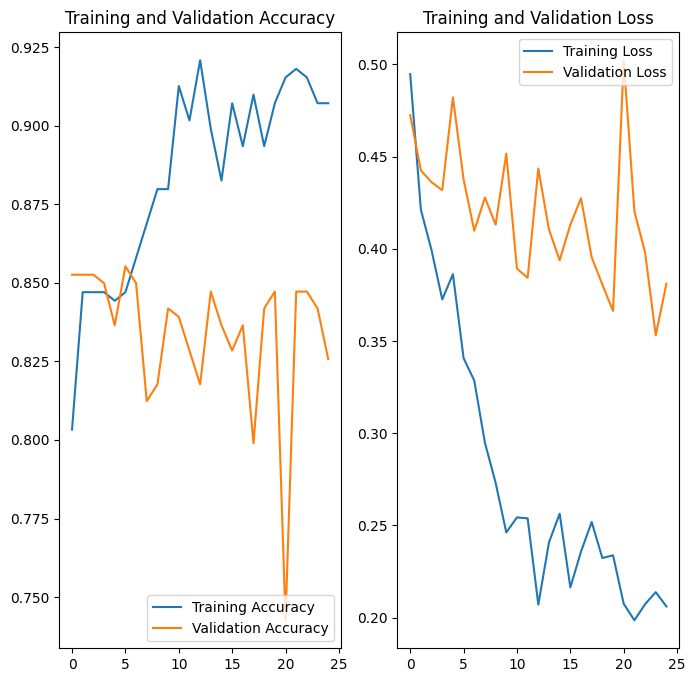

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
print(predictions_0)

[[2.55236998e-02]
 [5.78029230e-02]
 [2.32804921e-02]
 [1.05355613e-01]
 [3.28499049e-01]
 [2.33720049e-01]
 [1.11140080e-01]
 [1.60942995e-03]
 [2.64274716e-01]
 [8.13775212e-02]
 [3.71662580e-04]
 [7.19658434e-02]
 [6.47601783e-02]
 [2.80053169e-01]
 [8.22228849e-01]
 [8.11763167e-01]
 [1.96754131e-02]
 [1.97180547e-03]
 [8.89160633e-02]
 [5.87794296e-02]
 [2.78909095e-02]
 [5.78456186e-02]
 [7.86312163e-01]
 [5.98670542e-02]
 [1.05081573e-02]
 [5.71992099e-01]
 [2.38703284e-02]
 [7.99051404e-01]
 [5.08589186e-02]
 [6.93965733e-01]
 [2.92642019e-03]
 [3.60599086e-02]
 [2.46396810e-01]
 [3.97639364e-01]
 [1.55051981e-04]
 [3.18843514e-01]
 [3.50636274e-01]
 [2.18334589e-02]
 [1.39568197e-02]
 [3.68733644e-01]
 [3.54830295e-01]
 [9.22800973e-02]
 [4.69033986e-01]
 [2.86499746e-02]
 [9.50284451e-02]
 [2.89772954e-02]
 [2.06624150e-01]
 [1.51357725e-01]
 [4.89194244e-01]
 [7.52923042e-02]
 [4.65423521e-03]
 [9.93415341e-02]
 [4.62596774e-01]
 [5.55585921e-02]
 [1.50007987e-02]
 [8.169772

## load predictions from fold 0 into a list

In [21]:
preds_cls_idx = predictions_0.argmax(axis=-1)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(fold0_generator.filenames, preds_cls))

In [22]:
#print(filenames_to_cls)

In [23]:
# test = (filenames_to_cls[1][0])
# print(test)
# print(test.find("png"))
# print(test[test.find("THE"):test.find("png")+3])

## move predictions into their respective folder based on predicted label

In [24]:
predictions_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/predictions/"
predict_ushape = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/predictions/predict_ushape/"
predict_noushape = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/predictions/predict_noushape/"
if len(os.listdir(predictions_path))!=0:
    for f in os.listdir(predictions_path):
        if f.endswith("png"):
            os.remove(predictions_path+f)
for pred in filenames_to_cls:
    file_path = pred[0]
    #print(file_path)
    file = file_path[file_path.find("THE"):file_path.find("png")+3]
    if pred[1]=='noshape':
        shutil.move(file_path,predict_noushape+file)
    else:
        shutil.move(file_path,predict_ushape+file)

## move NOW LABELED data back into training set

In [25]:
for f in os.listdir(predict_noushape):
    file = f[f.find("THE"):f.find("png")+3]
    shutil.move(predict_noushape+f,train_noushape_path+f)
for f in os.listdir(predict_ushape):
    shutil.move(predict_ushape+f,train_ushape_path+f)

## recreate data frame from new training set

In [26]:
train_ushape = extract_spectrograms(train_ushape_path)
train_noushape = extract_spectrograms(train_noushape_path)

df_train = fill_df_with_label(train_ushape, "ushape").append(fill_df_with_label(train_noushape, "noshape"))

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

Found 1174 validated image filenames belonging to 2 classes.


## train model second time

In [27]:
model2 = create_model(METRICS)
history = model2.fit_generator(generator=
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)

C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\1706586468.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(generator=
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
37/37 [==============================] - 17s 440ms/step - loss: 0.3037 - accuracy: 0.9024 - precision: 0.2500 - recall: 0.1802 - auc: 0.6659 - prc: 0.1928 - val_loss: 0.5425 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4231 - val_prc: 0.1248
Epoch 2/25
37/37 [==============================] - 14s 389ms/step - loss: 0.1959 - accuracy: 0.9523 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6478 - prc: 0.0779 - val_loss: 0.6878 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4929 - val_prc: 0.1385
Epoch 3/25
37/37 [==============================] - 15s 395ms/step - loss: 0.1923 - accuracy: 0.9523 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6709 - prc: 0.0797 - val_loss: 0.6004 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5391 - val_prc: 0.1625
Epoch 4/25
37/37 [==============================] - 14s 384ms/step - loss: 0.1865 - accuracy:

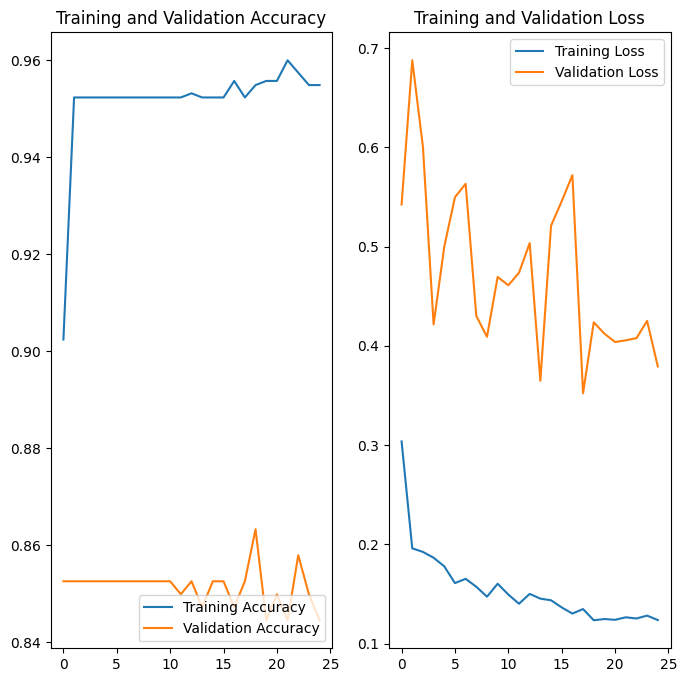

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## create generator for fold 1 and have model2 predict fold 1 labels

In [29]:
fold1_generator = test_datagen.flow_from_dataframe(
    fold1_dataframe,
    # directory='harp/validation/',
    class_mode=None,
    target_size=(224, 224),
)
predictions_1 = model2.predict_generator(fold1_generator,np.ceil(len(fold_1)/32))

Found 811 validated image filenames.


C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\1692341762.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_1 = model2.predict_generator(fold1_generator,np.ceil(len(fold_1)/32))


In [30]:
preds_cls_idx = predictions_1.argmax(axis=-1)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(fold1_generator.filenames, preds_cls))

In [31]:
if len(os.listdir(predictions_path))!=0:
    for f in os.listdir(predictions_path):
        if f.endswith("png"):
            os.remove(predictions_path+f)
for pred in filenames_to_cls:
    file_path = pred[0]
    #print(file_path)
    file = file_path[file_path.find("THE"):file_path.find("png")+3]
    if pred[1]=='noshape':
        shutil.move(file_path,predict_noushape+file)
    else:
        shutil.move(file_path,predict_ushape+file)

In [32]:
for f in os.listdir(predict_noushape):
    file = f[f.find("THE"):f.find("png")+3]
    shutil.move(predict_noushape+f,train_noushape_path+f)
for f in os.listdir(predict_ushape):
    shutil.move(predict_ushape+f,train_ushape_path+f)

In [33]:
train_ushape = extract_spectrograms(train_ushape_path)
train_noushape = extract_spectrograms(train_noushape_path)

df_train = fill_df_with_label(train_ushape, "ushape").append(fill_df_with_label(train_noushape, "noshape"))

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

Found 1985 validated image filenames belonging to 2 classes.


C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\38329695.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(generator=
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
63/63 [==============================] - 28s 412ms/step - loss: 0.2848 - accuracy: 0.9517 - precision: 0.4286 - recall: 0.0811 - auc: 0.7020 - prc: 0.1740 - val_loss: 0.5725 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4942 - val_prc: 0.1415
Epoch 2/25
63/63 [==============================] - 25s 390ms/step - loss: 0.1196 - accuracy: 0.9718 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7277 - prc: 0.0961 - val_loss: 0.6966 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5256 - val_prc: 0.1588
Epoch 3/25
63/63 [==============================] - 27s 432ms/step - loss: 0.1121 - accuracy: 0.9718 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7961 - prc: 0.1049 - val_loss: 0.7684 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5704 - val_prc: 0.1950
Epoch 4/25
63/63 [==============================] - 25s 390ms/step - loss: 0.1433 - accuracy:

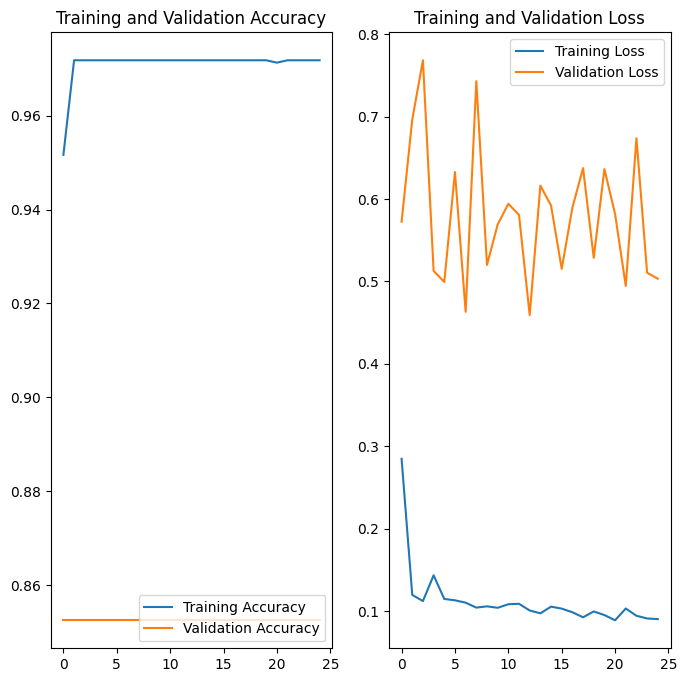

In [34]:
#call model again
model3 = create_model(METRICS)
history = model3.fit_generator(generator=
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [35]:
fold2_generator = test_datagen.flow_from_dataframe(
    fold2_dataframe,
    # directory='harp/validation/',
    class_mode=None,
    target_size=(224, 224),
)
predictions_2 = model3.predict_generator(fold2_generator,np.ceil(len(fold_2)/32))

Found 811 validated image filenames.


C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\2757514.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_2 = model3.predict_generator(fold2_generator,np.ceil(len(fold_2)/32))


In [36]:
preds_cls_idx = predictions_2.argmax(axis=-1)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(fold2_generator.filenames, preds_cls))
if len(os.listdir(predictions_path))!=0:
    for f in os.listdir(predictions_path):
        if f.endswith("png"):
            os.remove(predictions_path+f)
for pred in filenames_to_cls:
    file_path = pred[0]
    #print(file_path)
    file = file_path[file_path.find("THE"):file_path.find("png")+3]
    if pred[1]=='noshape':
        shutil.move(file_path,predict_noushape+file)
    else:
        shutil.move(file_path,predict_ushape+file)
for f in os.listdir(predict_noushape):
    file = f[f.find("THE"):f.find("png")+3]
    shutil.move(predict_noushape+f,train_noushape_path+f)
for f in os.listdir(predict_ushape):
    shutil.move(predict_ushape+f,train_ushape_path+f)

In [37]:
train_ushape = extract_spectrograms(train_ushape_path)
train_noushape = extract_spectrograms(train_noushape_path)

df_train = fill_df_with_label(train_ushape, "ushape").append(fill_df_with_label(train_noushape, "noshape"))

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

Found 2796 validated image filenames belonging to 2 classes.


C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\2047540535.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model4.fit_generator(generator=
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
88/88 [==============================] - 33s 367ms/step - loss: 0.1320 - accuracy: 0.9574 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6742 - prc: 0.0628 - val_loss: 0.4703 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5136 - val_prc: 0.1446
Epoch 2/25
88/88 [==============================] - 33s 376ms/step - loss: 0.0859 - accuracy: 0.9800 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7908 - prc: 0.0720 - val_loss: 0.5523 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5404 - val_prc: 0.1668
Epoch 3/25
88/88 [==============================] - 33s 366ms/step - loss: 0.0839 - accuracy: 0.9800 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8240 - prc: 0.1065 - val_loss: 0.4611 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6279 - val_prc: 0.2249
Epoch 4/25
88/88 [==============================] - 33s 367ms/step - loss: 0.0874 - a

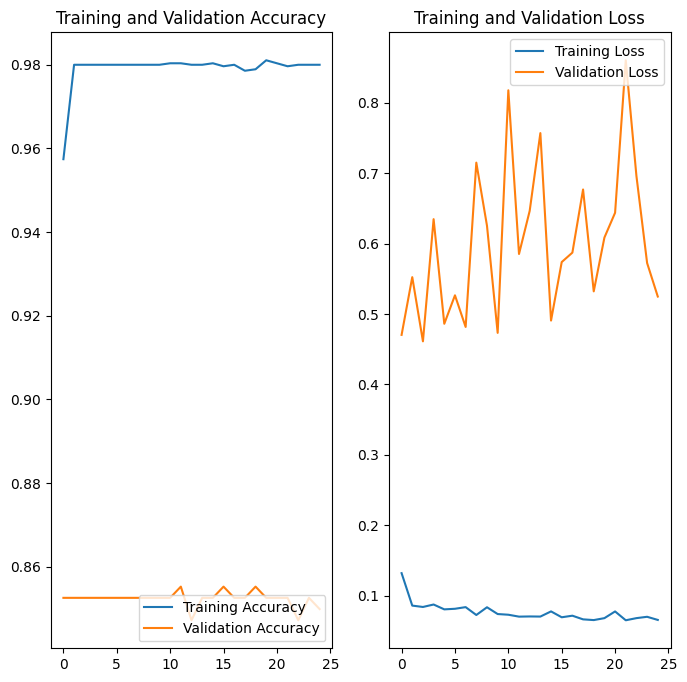

In [38]:
#call model again
model4 = create_model(METRICS)
history = model4.fit_generator(generator=
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [39]:
fold3_generator = test_datagen.flow_from_dataframe(
    fold3_dataframe,
    # directory='harp/validation/',
    class_mode=None,
    target_size=(224, 224),
)
predictions_2 = model3.predict_generator(fold3_generator,np.ceil(len(fold_3)/32))

Found 818 validated image filenames.


C:\Users\jereb\AppData\Local\Temp\ipykernel_21880\3629591438.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_2 = model3.predict_generator(fold3_generator,np.ceil(len(fold_3)/32))


In [40]:
preds_cls_idx = predictions_2.argmax(axis=-1)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(fold2_generator.filenames, preds_cls))
if len(os.listdir(predictions_path))!=0:
    for f in os.listdir(predictions_path):
        if f.endswith("png"):
            os.remove(predictions_path+f)
for pred in filenames_to_cls:
    file_path = pred[0]
    #print(file_path)
    file = file_path[file_path.find("THE"):file_path.find("png")+3]
    if pred[1]=='noshape':
        shutil.move(file_path,predict_noushape+file)
    else:
        shutil.move(file_path,predict_ushape+file)
for f in os.listdir(predict_noushape):
    file = f[f.find("THE"):f.find("png")+3]
    shutil.move(predict_noushape+f,train_noushape_path+f)
for f in os.listdir(predict_ushape):
    shutil.move(predict_ushape+f,train_ushape_path+f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/unlabeled/fold_2/THE_stft_20140615_20140616_dynamic.png'

In [ ]:
train_ushape = extract_spectrograms(train_ushape_path)
train_noushape = extract_spectrograms(train_noushape_path)

df_train = fill_df_with_label(train_ushape, "ushape").append(fill_df_with_label(train_noushape, "noshape"))

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224)
)

In [ ]:
#call model again
model5 = create_model(METRICS)
history = model5.fit_generator(generator=
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()